In [20]:
# Vishakha Dixit
# 801265288
# HW-5 Solutions

import torch
torch.version.__version__

import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import torch.optim as optim
import torch.nn as nn

In [2]:
# Problem-1

In [3]:
# Model and Function Definitions
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])
 
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092190
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


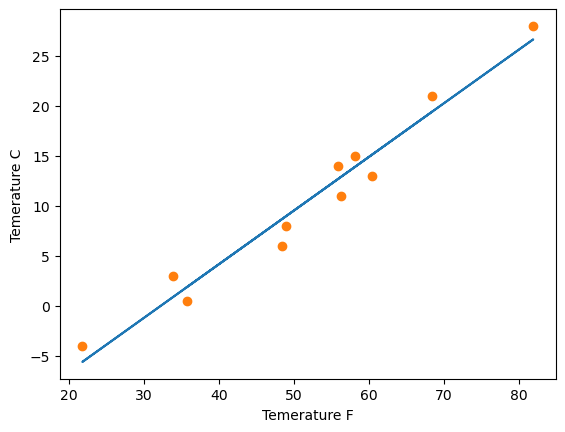

In [4]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure()
plt.xlabel("Temerature F")
plt.ylabel("Temerature C")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [5]:
# Non-Linear Model
def model_non_lin(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def dmodel_dw1(t_u, w1, w2, b):
    return t_u

def dmodel_dw2(t_u, w1, w2, b):
  return t_u**2

def dmodel_db_non_lin(t_u, w1, w2, b):
    return 1.0

def grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
  dloss_db = dloss_dtp * dmodel_db_non_lin(t_u, w1, w2, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

def training_loop_non_lin(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w1, w2, b = params

    t_p = model_non_lin(t_u, w1, w2, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b)
    params = params - learning_rate * grad
    
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 10.708598
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


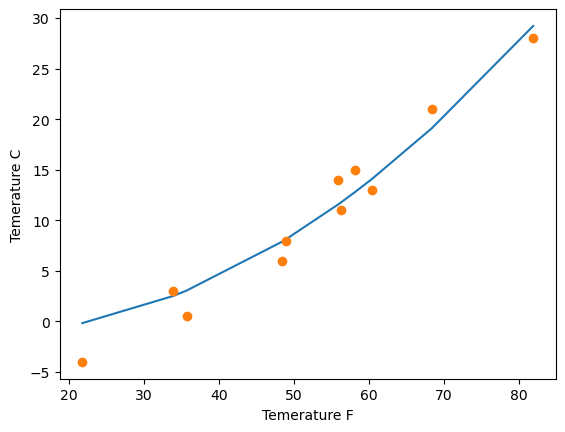

In [6]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u
params = training_loop_non_lin(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

t_p = model_non_lin(t_un, *params)

fig = plt.figure()
plt.xlabel("Temerature F")
plt.ylabel("Temerature C")
plt.plot(np.sort(t_u.numpy()), np.sort(t_p.detach().numpy()))
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [7]:
# Problem-2

In [8]:
housing = pd.DataFrame(pd.read_csv("Housing.csv")) 

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars]
y = Newtrain.pop('price').to_numpy(np.float64)
x = Newtrain.to_numpy(np.float64)

In [9]:
# Model and functions for training of Housing dataset
def model_house(x, w, b):
  return np.matmul(x, w) + b

def dmodel_dw1_house(x, w, b):
  return x[:,0]
def dmodel_dw2_house(x, w, b):
  return x[:,1]
def dmodel_dw3_house(x, w, b):
  return x[:,2]
def dmodel_dw4_house(x, w, b):
  return x[:,3]
def dmodel_dw5_house(x, w, b):
  return x[:,4]

def dmodel_db_house(x, w, b):
  return 1.0

def grad_fn_house(x, y, pred, w, b):
  dloss_dtp = dloss_fn(pred, y)
  dloss_dw1 = dloss_dtp * dmodel_dw1_house(x, w, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2_house(x, w, b)
  dloss_dw3 = dloss_dtp * dmodel_dw3_house(x, w, b)
  dloss_dw4 = dloss_dtp * dmodel_dw4_house(x, w, b)
  dloss_dw5 = dloss_dtp * dmodel_dw5_house(x, w, b)
  dloss_db = dloss_dtp * dmodel_db_house(x, w, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
 
def training_loop_house(n_epochs, learning_rate, params, x, y):
  for epoch in range(1, n_epochs + 1):
    b = params[-1]
    w = params[:-1]

    pred = model_house(x, w, b)
    loss = loss_fn(pred, y)
    grad = grad_fn_house(x, y, pred, w, b)
    #print(params, grad)
    #input()
    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 2024805783902.583984
Epoch 1000, Loss 1863258466727.914307
Epoch 1500, Loss 1768051362590.842285
Epoch 2000, Loss 1704595000950.190430
Epoch 2500, Loss 1659789065346.188721
Epoch 3000, Loss 1627244053690.387207
Epoch 3500, Loss 1603242094079.036865
Epoch 4000, Loss 1585383250941.523193
Epoch 4500, Loss 1572022959620.682861
Epoch 5000, Loss 1561993317652.091797
tensor(7528113.7117, dtype=torch.float64)
tensor(13300000., dtype=torch.float64)


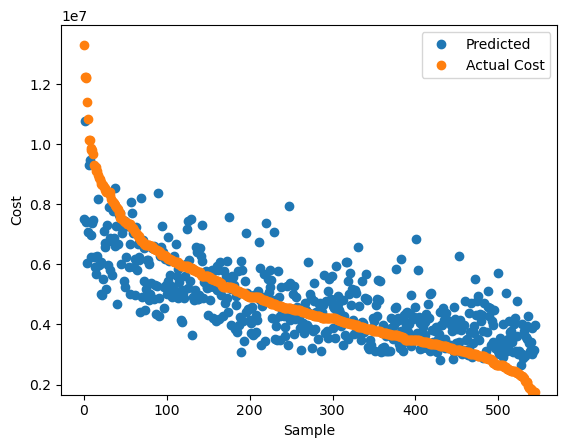

In [10]:
max_x = np.amax(x, axis=0)
max_y = np.amax(y)

new_x = x
new_y = y 

# normalize all parameters
new_x[:,0] = x[:,0]/max_x[0]
new_x[:,1] = x[:,1]/max_x[1]
new_x[:,2] = x[:,2]/max_x[2]
new_x[:,3] = x[:,3]/max_x[3]
new_x[:,4] = x[:,4]/max_x[4]
# new_y = y/max_y

new_x = torch.tensor(new_x)
new_y = torch.tensor(new_y)

# train model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

pred = model_house(new_x, params[:-1], params[-1])
print(pred[0])
print(new_y[0])
fig = plt.figure()
plt.xlabel("Sample")
plt.ylabel("Cost")
plt.ylim([np.amin(y) * .95, np.amax(y) * 1.05])
plt.plot(pred.detach().numpy(), 'o', label="Predicted")
plt.plot(new_y.numpy(), 'o', label="Actual Cost")
plt.legend()

In [11]:
# train model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

Epoch 500, Loss 1562038499136.447754
Epoch 1000, Loss 1533011436311.196045
Epoch 1500, Loss 1531161953474.365967
Epoch 2000, Loss 1531023620738.500000
Epoch 2500, Loss 1531010431223.014648
Epoch 3000, Loss 1531008830650.815186
Epoch 3500, Loss 1531008603760.256836
Epoch 4000, Loss 1531008569139.817139
Epoch 4500, Loss 1531008563697.867188
Epoch 5000, Loss 1531008562832.778076


In [12]:
# train model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

Epoch 500, Loss 3072062726282.624512
Epoch 1000, Loss 2296907167134.038574
Epoch 1500, Loss 2232371360543.122070
Epoch 2000, Loss 2193782354830.531738
Epoch 2500, Loss 2159229566168.539551
Epoch 3000, Loss 2127641802634.025635
Epoch 3500, Loss 2098653066954.163330
Epoch 4000, Loss 2071963969776.395020
Epoch 4500, Loss 2047315431531.889648
Epoch 5000, Loss 2024482486682.452148


In [13]:
# train model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

Epoch 500, Loss 19251112139782.332031
Epoch 1000, Loss 14310293891420.976562
Epoch 1500, Loss 10812095187644.591797
Epoch 2000, Loss 8334880776716.513672
Epoch 2500, Loss 6580251272419.132812
Epoch 3000, Loss 5337023626161.937500
Epoch 3500, Loss 4455739431133.308594
Epoch 4000, Loss 3830623970746.783203
Epoch 4500, Loss 3386818298639.674316
Epoch 5000, Loss 3071343142051.185059


In [14]:
# Problem-3

In [15]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

varList=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes':1,"no":0})

housing[varList] = housing[varList].apply(binary_map)

In [16]:
# splitting the data
scaler = StandardScaler()
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.8, test_size=0.2, random_state=np.random)

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# scaling the data
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

y_Newtrain = df_Newtrain.pop('price')
x_Newtrain = df_Newtrain
y_Newtest = df_Newtest.pop('price')
x_Newtest = df_Newtest

# convert the data to tensors
x_train = torch.tensor(x_Newtrain.values).float()
x_val = torch.tensor(x_Newtest.values).float()
y_train = torch.tensor(y_Newtrain.values).float().unsqueeze(-1)
y_val = torch.tensor(y_Newtest.values).float().unsqueeze(-1)
print(y_val.size())

torch.Size([109, 1])


In [17]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val, y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        p_train = model(x_train) # <1>
        loss_train = loss_fn(p_train, y_train)

        p_val = model(x_val) # <1>
        loss_val = loss_fn(p_val, y_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [18]:
seq_model = nn.Sequential(
            nn.Linear(len(num_vars)-1, 8),
            nn.Tanh(),
            nn.Linear(8, 1))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    x_train = x_train,
    x_val = x_val, 
    y_train = y_train,
    y_val = y_val)

Epoch 1, Training loss 1.0741, Validation loss 1.0900
Epoch 10, Training loss 1.0555, Validation loss 1.0723
Epoch 20, Training loss 1.0356, Validation loss 1.0534
Epoch 30, Training loss 1.0163, Validation loss 1.0351
Epoch 40, Training loss 0.9976, Validation loss 1.0174
Epoch 50, Training loss 0.9795, Validation loss 1.0002
Epoch 60, Training loss 0.9620, Validation loss 0.9836
Epoch 70, Training loss 0.9450, Validation loss 0.9675
Epoch 80, Training loss 0.9284, Validation loss 0.9518
Epoch 90, Training loss 0.9123, Validation loss 0.9365
Epoch 100, Training loss 0.8967, Validation loss 0.9217
Epoch 110, Training loss 0.8814, Validation loss 0.9072
Epoch 120, Training loss 0.8665, Validation loss 0.8931
Epoch 130, Training loss 0.8519, Validation loss 0.8793
Epoch 140, Training loss 0.8377, Validation loss 0.8658
Epoch 150, Training loss 0.8238, Validation loss 0.8527
Epoch 160, Training loss 0.8103, Validation loss 0.8398
Epoch 170, Training loss 0.7970, Validation loss 0.8272
Epo

In [19]:
seq_model_2 = nn.Sequential(
            nn.Linear(len(num_vars)-1, 8),
            nn.Tanh(),
            nn.Linear(8, 6),
            nn.Tanh(),
            nn.Linear(6, 4),
            nn.Tanh(),
            nn.Linear(4, 1))

optimizer = optim.SGD(seq_model_2.parameters(), lr=1e-3)

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = seq_model_2,
    loss_fn = nn.MSELoss(),
    x_train = x_train,
    x_val = x_val, 
    y_train = y_train,
    y_val = y_val)

Epoch 1, Training loss 1.2116, Validation loss 1.2009
Epoch 10, Training loss 1.1992, Validation loss 1.1885
Epoch 20, Training loss 1.1862, Validation loss 1.1756
Epoch 30, Training loss 1.1740, Validation loss 1.1635
Epoch 40, Training loss 1.1625, Validation loss 1.1522
Epoch 50, Training loss 1.1518, Validation loss 1.1415
Epoch 60, Training loss 1.1416, Validation loss 1.1314
Epoch 70, Training loss 1.1321, Validation loss 1.1219
Epoch 80, Training loss 1.1231, Validation loss 1.1130
Epoch 90, Training loss 1.1146, Validation loss 1.1046
Epoch 100, Training loss 1.1066, Validation loss 1.0966
Epoch 110, Training loss 1.0991, Validation loss 1.0891
Epoch 120, Training loss 1.0919, Validation loss 1.0820
Epoch 130, Training loss 1.0852, Validation loss 1.0752
Epoch 140, Training loss 1.0788, Validation loss 1.0688
Epoch 150, Training loss 1.0727, Validation loss 1.0628
Epoch 160, Training loss 1.0669, Validation loss 1.0570
Epoch 170, Training loss 1.0614, Validation loss 1.0515
Epo